# 4 Potential Vaccine Portfolio Risk and Returns (Coronavirus)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# 4 Companies Vanccine 
symbols = ['ABBV','MRK','PFE','BMY']
start = '2020-01-01'
end = '2020-11-20'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

322

In [7]:
df.head()

,ABBV,MRK,PFE,BMY
Date,,,,
2020-01-02,84.852608,89.912033,35.677311,61.879055
2020-01-03,84.047203,89.140297,35.485886,61.331974
2020-01-06,84.710480,89.521278,35.440315,61.527363
2020-01-07,84.227234,87.137688,35.321815,62.455448
2020-01-08,84.824188,86.551559,35.604385,62.387066


In [8]:
df.tail()

,ABBV,MRK,PFE,BMY
Date,,,,
2020-11-13,99.040001,81.089996,36.641365,63.619999
2020-11-16,98.360001,80.180000,35.417458,64.500000
2020-11-17,99.209999,81.500000,36.040001,64.320000
2020-11-18,98.720001,80.250000,36.320000,62.009998
2020-11-19,99.669998,80.389999,36.189999,62.090000


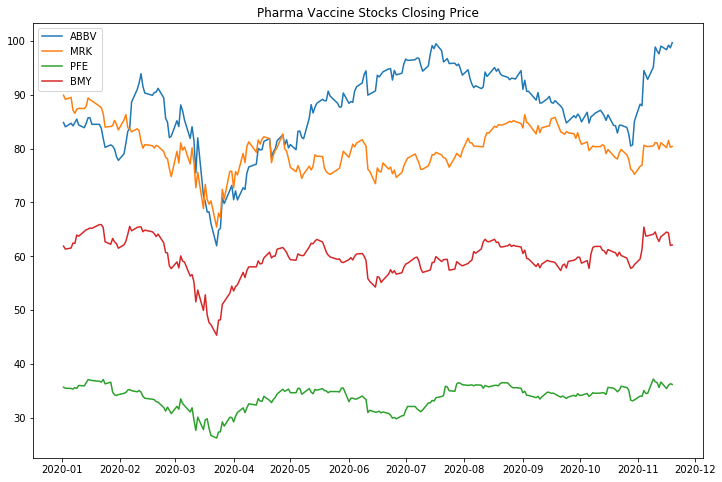

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Pharma Vaccine Stocks Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

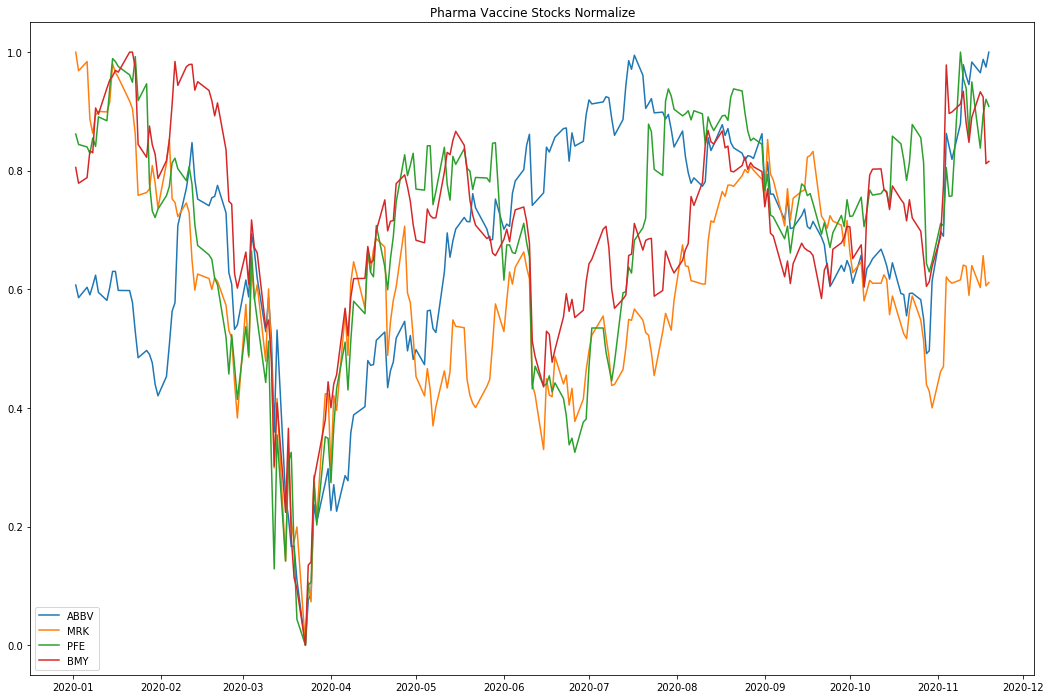

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Pharma Vaccine Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

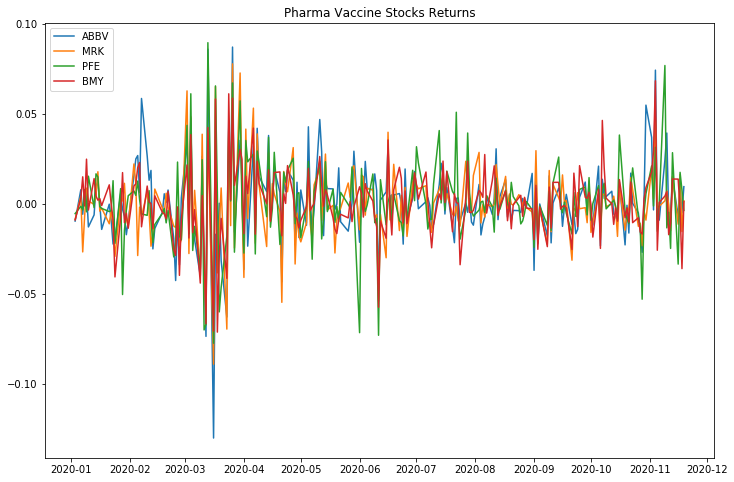

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Pharma Vaccine Stocks Returns')
plt.legend(labels=stock_rets.columns)

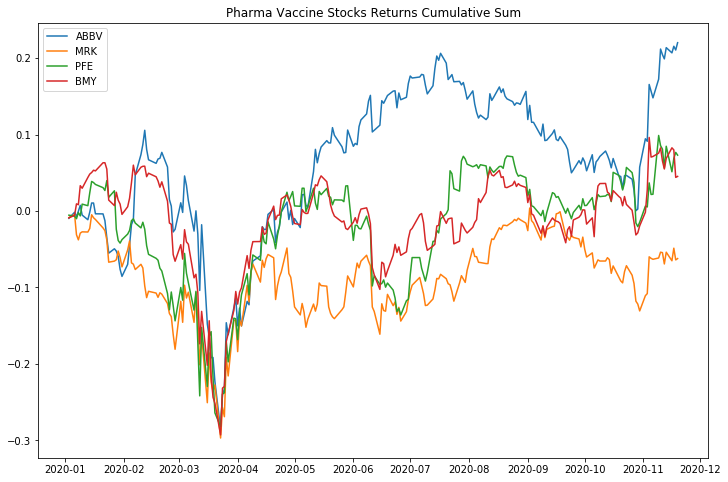

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Pharma Vaccine Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

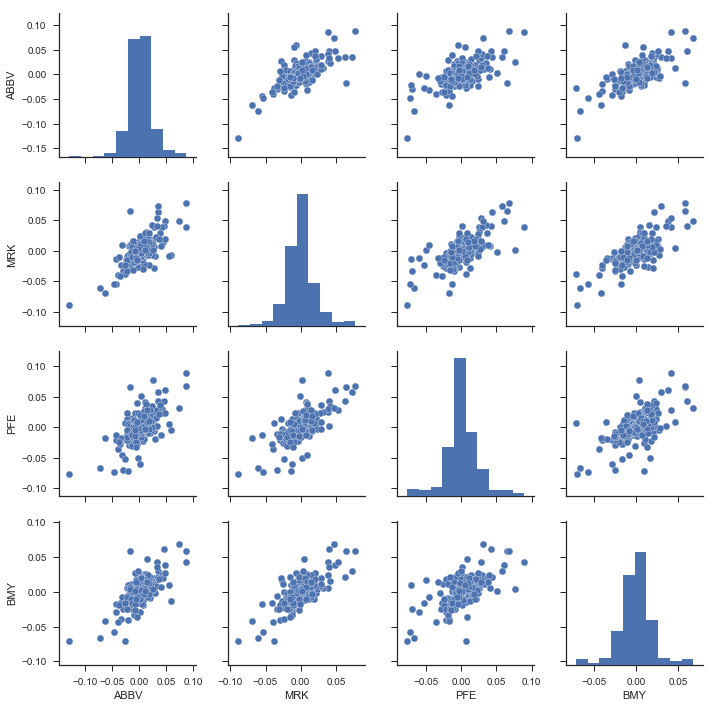

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

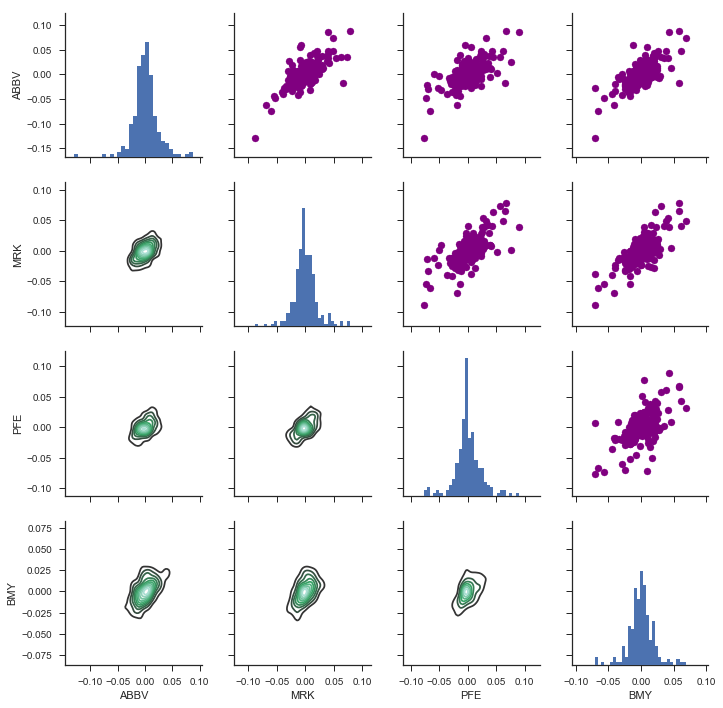

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

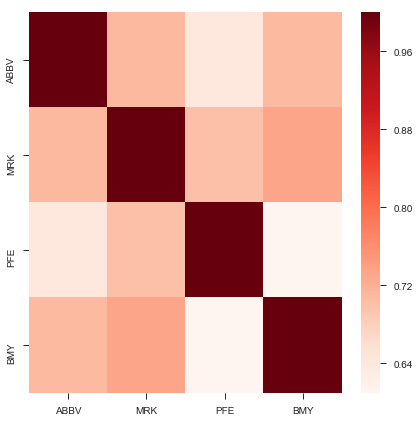

In [17]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

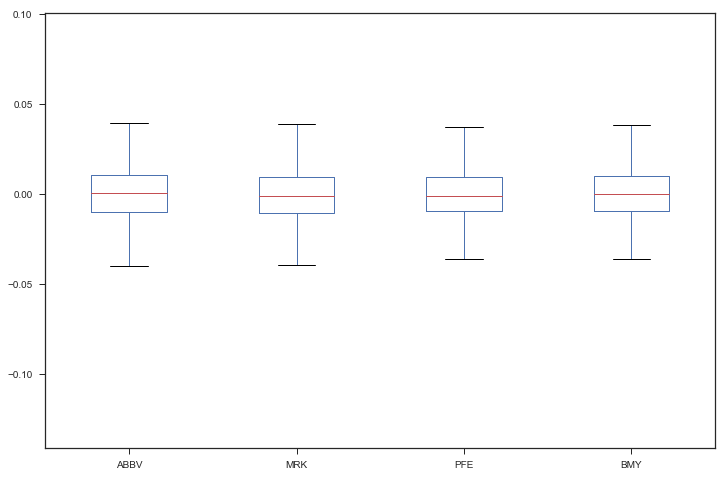

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

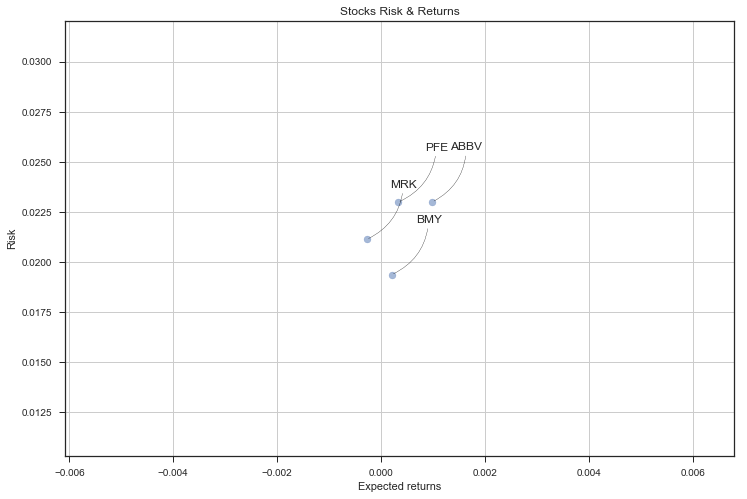

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

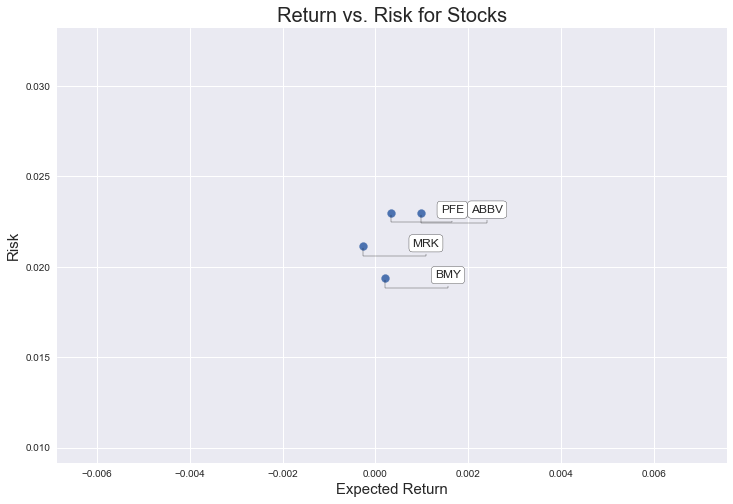

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

BMY   BMY     1.000000
PFE   PFE     1.000000
MRK   MRK     1.000000
ABBV  ABBV    1.000000
BMY   MRK     0.733600
MRK   BMY     0.733600
      ABBV    0.710252
ABBV  MRK     0.710252
BMY   ABBV    0.707780
ABBV  BMY     0.707780
PFE   MRK     0.702017
MRK   PFE     0.702017
PFE   ABBV    0.641525
ABBV  PFE     0.641525
BMY   PFE     0.609617
PFE   BMY     0.609617
dtype: float64

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,ABBV,MRK,PFE,BMY
Date,,,,
2020-01-03,0.554937,0.481979,0.431144,0.446546
2020-01-06,0.634973,0.559048,0.455590,0.532701
2020-01-07,0.572374,0.373827,0.443254,0.617934
2020-01-08,0.631270,0.493109,0.511199,0.502036
2020-01-09,0.634126,0.586201,0.437214,0.688237


In [23]:
Normalized_Value.corr()

,ABBV,MRK,PFE,BMY
ABBV,1.000000,0.710252,0.641525,0.707780
MRK,0.710252,1.000000,0.702017,0.733600
PFE,0.641525,0.702017,1.000000,0.609617
BMY,0.707780,0.733600,0.609617,1.000000


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

BMY   BMY     1.000000
PFE   PFE     1.000000
MRK   MRK     1.000000
ABBV  ABBV    1.000000
BMY   MRK     0.733600
MRK   BMY     0.733600
      ABBV    0.710252
ABBV  MRK     0.710252
BMY   ABBV    0.707780
ABBV  BMY     0.707780
PFE   MRK     0.702017
MRK   PFE     0.702017
PFE   ABBV    0.641525
ABBV  PFE     0.641525
BMY   PFE     0.609617
PFE   BMY     0.609617
dtype: float64

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
ABBV    0.000984
MRK    -0.000277
PFE     0.000327
BMY     0.000202
dtype: float64
--------------------------------------------------
Stock risks:
ABBV    0.022996
MRK     0.021129
PFE     0.022986
BMY     0.019371
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
MRK,-0.000277,0.021129
BMY,0.000202,0.019371
PFE,0.000327,0.022986
ABBV,0.000984,0.022996


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
BMY,0.000202,0.019371
MRK,-0.000277,0.021129
PFE,0.000327,0.022986
ABBV,0.000984,0.022996


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
ABBV,0.000984,0.022996,-0.392082
MRK,-0.000277,0.021129,-0.486408
PFE,0.000327,0.022986,-0.420838
BMY,0.000202,0.019371,-0.505794


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
ABBV,0.000984,0.022996,-0.392082,0.087174,-0.130022,0.000456,0.962315
MRK,-0.000277,0.021129,-0.486408,0.077836,-0.088990,-0.001376,0.174454
PFE,0.000327,0.022986,-0.420838,0.089607,-0.077346,-0.001306,-0.357932
BMY,0.000202,0.019371,-0.505794,0.068419,-0.071178,0.000249,0.129014


In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
ABBV,0.000984,0.022996,-0.392082,0.087174,-0.130022,0.000456,0.962315,0.000030
MRK,-0.000277,0.021129,-0.486408,0.077836,-0.088990,-0.001376,0.174454,0.000005
PFE,0.000327,0.022986,-0.420838,0.089607,-0.077346,-0.001306,-0.357932,-0.000011
BMY,0.000202,0.019371,-0.505794,0.068419,-0.071178,0.000249,0.129014,0.000004


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
ABBV,0.000984,0.022996,-0.392082,0.087174,-0.130022,0.000456,0.962315,0.000030,0.134237
MRK,-0.000277,0.021129,-0.486408,0.077836,-0.088990,-0.001376,0.174454,0.000005,-0.083879
PFE,0.000327,0.022986,-0.420838,0.089607,-0.077346,-0.001306,-0.357932,-0.000011,0.011229
BMY,0.000202,0.019371,-0.505794,0.068419,-0.071178,0.000249,0.129014,0.000004,0.002667


In [35]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
PFE,0.000327,0.022986,-0.420838,0.089607,-0.077346,-0.001306,-0.357932,-0.000011,0.011229
BMY,0.000202,0.019371,-0.505794,0.068419,-0.071178,0.000249,0.129014,0.000004,0.002667
MRK,-0.000277,0.021129,-0.486408,0.077836,-0.088990,-0.001376,0.174454,0.000005,-0.083879
ABBV,0.000984,0.022996,-0.392082,0.087174,-0.130022,0.000456,0.962315,0.000030,0.134237
